In [3]:
import os
import sys
import time

import numpy as np
import pandas as pd
import pyarrow.parquet as pq

catalog_dir = '/data3/epyc/data3/hipscat/catalogs/ztf_dr14/'

partition_info = os.path.join(hipscat_dir, "partition_info.csv")
data_frame = pd.read_csv(partition_info)

output_frame = data_frame.copy()
# output_frame["num_rows"] = np.nan
# output_frame["num_ids"] = np.nan
output_frame["size_on_disk"] = 0

for index, partition in data_frame.iterrows():
    file_name = os.path.join(
        hipscat_dir,
        f"Norder={int(partition['Norder'])}",
        f"Dir={int(partition['Dir'])}",
        f"Npix={int(partition['Npix'])}.parquet",
    )
    output_frame.loc[index, "size_on_disk"] = os.path.getsize(file_name)
#     parquet_file = pq.ParquetFile(file_name)
#     output_frame.loc[index, "num_rows"] = parquet_file.metadata.num_rows    

#     partition_frame = pd.read_parquet(file_name, engine="pyarrow")

#     assert id_column in partition_frame.columns
#     ids = partition_frame[id_column].tolist()
#     set_ids = [*set(ids)]
#     output_frame.loc[index, "num_ids"] = len(set_ids)
    
#     print(f'{parquet_file.metadata.num_rows} ({len(set_ids)} unique)')
    
print(output_frame.head(2))

output_frame = output_frame.astype(int)
partition_info = "/astro/users/mmd11/catalogs/ztf_dr14_big_more_partition_info.csv"
output_frame.to_csv(partition_info, index=False)

   Norder  Dir  Npix  row_count  size_on_disk
0       1    0    33     982531     729684395
1       1    0    34     879169     597447152


In [8]:
print(f'healpix orders: {output_frame["Norder"].unique()}')
print(f'num partitions: {len(output_frame["Npix"])}')
print('------')
print(f'min objects: {output_frame["row_count"].min()}')
print(f'max objects: {output_frame["row_count"].max()}')
print(f'object ratio: {output_frame["row_count"].max()/output_frame["row_count"].min()}')
print('------')
print(f'min size_on_disk: {output_frame["size_on_disk"].min()}')
print(f'max size_on_disk: {output_frame["size_on_disk"].max()}')
print(f'size_on_disk ratio: {output_frame["size_on_disk"].max()/output_frame["size_on_disk"].min()}')
print(f'total size_on_disk: {output_frame["size_on_disk"].sum()}')

healpix orders: [1 2 3 4 5 6]
num partitions: 2352
------
min objects: 4442
max objects: 998280
object ratio: 224.73660513282306
------
min size_on_disk: 2664760
max size_on_disk: 9837422285
size_on_disk ratio: 3691.6729030006454
total size_on_disk: 5516364532267


In [11]:
bytes_in_gb = 1024 * 1024 * 1024

print(len(output_frame[output_frame["size_on_disk"] > bytes_in_gb]))


1816


In [15]:
order_5 = output_frame[(output_frame["Norder"] == 5) & (output_frame["Dir"]==10000)]
order_5["gbs"] = order_5["size_on_disk"]/bytes_in_gb
print(order_5)

print(9837422285/bytes_in_gb)

      Norder    Dir   Npix  row_count  size_on_disk       gbs
2276       5  10000  10716     114398     298357735  0.277867
2277       5  10000  10717     765638    3662068192  3.410567
2278       5  10000  10718     639172    1518119959  1.413859
2279       5  10000  10719     694780    2082594382  1.939567
2280       5  10000  10740     462434    1039758578  0.968351
2281       5  10000  10741     507350    1103592151  1.027800
2282       5  10000  10742     263650     509670646  0.474668
2283       5  10000  10743     358825     721356260  0.671815
2284       5  10000  12012      57973     150012197  0.139710
2285       5  10000  12013     355825     966531786  0.900153
2286       5  10000  12014     456649    1248249859  1.162523
2287       5  10000  12015     426510    1190645757  1.108875
2288       5  10000  12024     318958     880048436  0.819609
2289       5  10000  12025     298252     882751041  0.822126
2290       5  10000  12026     391908    1091037533  1.016108
2291    

/tmp/ipykernel_63056/1832737344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_5["gbs"] = order_5["size_on_disk"]/bytes_in_gb


(array([463., 700., 533., 312., 157.,  80.,  69.,  26.,   9.,   3.]),
 array([2.48175114e-03, 9.18414921e-01, 1.83434809e+00, 2.75028126e+00,
        3.66621443e+00, 4.58214760e+00, 5.49808077e+00, 6.41401394e+00,
        7.32994711e+00, 8.24588028e+00, 9.16181345e+00]),
 <BarContainer object of 10 artists>)

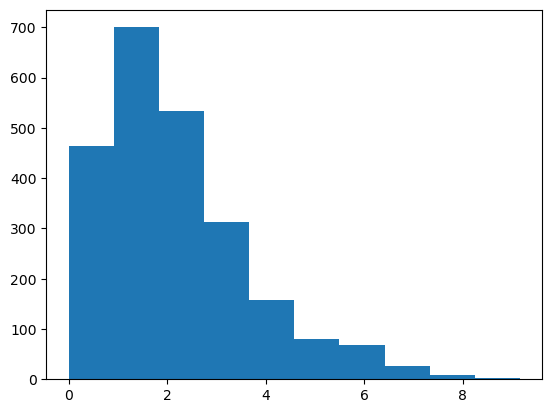

In [21]:
# import matplotlib as plt
import matplotlib
import matplotlib.pyplot as plt

output_frame["gbs"] = output_frame["size_on_disk"]/bytes_in_gb

# plt.hist(output_frame["gbs"], [0, 0.1, .8, 1, 5, 10])

plt.hist(output_frame["gbs"])